## BIKE SHARING ASSIGNMENT

## 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### As we know building a ML model involves some steps, I have tried to follow those steps as far as possible.

1. Reading, understanding and visualising the data.
2. Preparing the Data
3. Training the Model.
4. Residual Analysis.
5. Prediction & Evaluation on TEST set.

### STEP - 1  Reading the data

In [3]:
#creating a data frame from the given dataset

bike_df=pd.read_csv('day.csv')

### 1.1 Understanding the DATA
📌 After creating the DataFrame now let us inspect the dataset 

In [4]:
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking the details of the columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Looking for NULL values if any
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#checking NULL row wise
round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

📌 There are no NULL values, neither in ROWS nor in Columns

In [10]:
# Removing duplicates if any 
bike_df.drop_duplicates(inplace=True)

In [11]:
bike_df.shape

(730, 16)

📌 There are No duplicates as the shape of data frame before and after dropping duplicates is exactly the same.

#### Removing unwanted columns

'instant'= As it is same as index value

'dteday'=This has the date, we can use 'year' and 'month' column in place of this.

'casual' & 'registered'= We remove this as it is nearly same, containing onloy the count of bikes booked. We can use the 'cnt' column our analysis.

In [12]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### 1.2 Visualising the DATA   

Now that we are done with cleaing the data let us now look at some visual aspects that we get from the given data

In [13]:
# Analysing Numerical predictor variables.

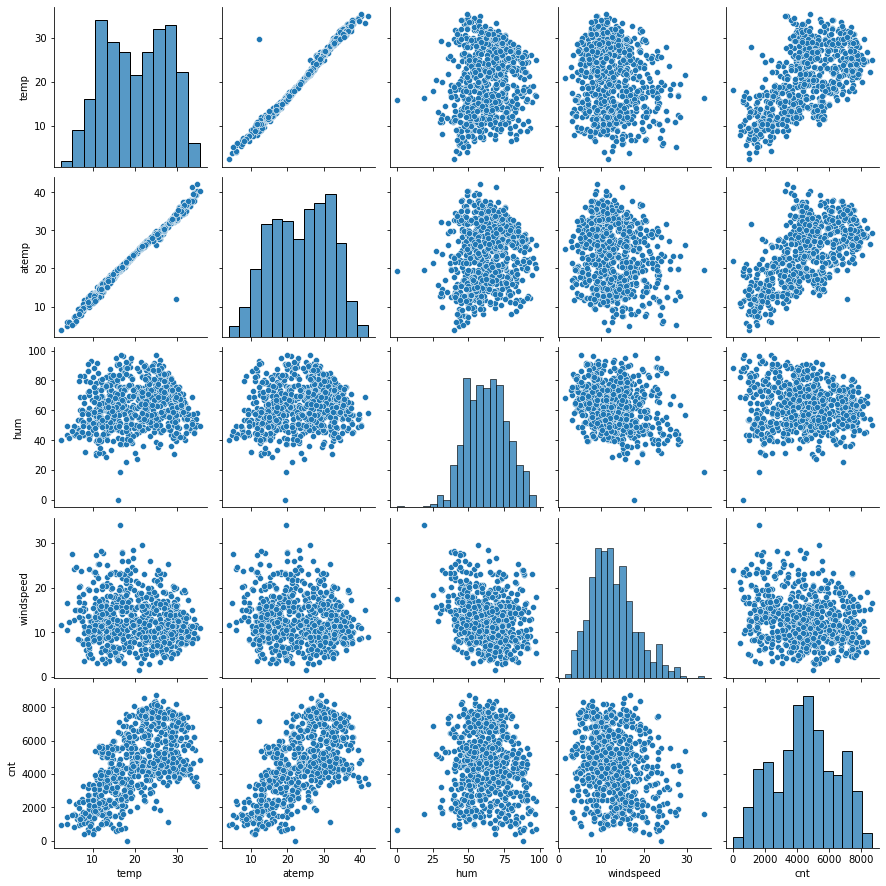

In [14]:
sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

📌 temp and atepm have positive linear realteionship with cnt.
Also there is a complete linear relation b/w temp and atemp.Which points to multicolinearity, however we will confirm this once we also look at the co-relation b/w them.

In [15]:
# Analysis of all the categorical predictor variables with the Target variable

In [15]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
# Mapping the columns with understandable string value as siggested in the problem statement.
# mapping the season column
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# mapping the month column
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# mapping the weekday column
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# mapping the weathersit column
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow_rain',4:'Heavy_snow_rain'})

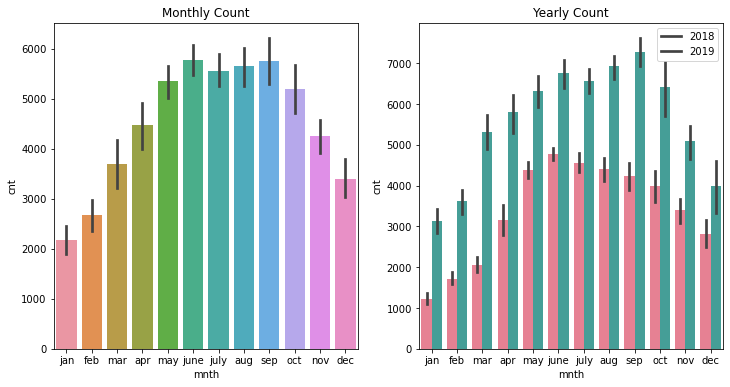

In [17]:
# Month VS cnt
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('mnth','cnt',data=bike_df).set(title='Monthly Count')
plt.subplot(1,2,2)
sns.barplot('mnth','cnt',data=bike_df, hue='yr',palette='husl').set(title='Yearly Count')
plt.legend(labels=['2018', '2019'])
plt.show()

 📌 As we can see here months May-October saw highest number of bookings, also the number of bookings increased every month
in 2019 as compared to 2018. we see increase from start of year and gradually decrease towards end year for both the years.

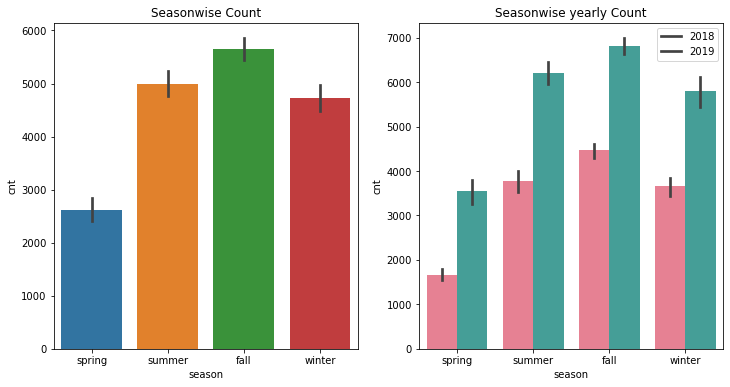

In [18]:
# Seasons VS cnt
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=bike_df).set(title='Seasonwise Count')
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=bike_df, hue='yr',palette='husl').set(title='Seasonwise yearly Count')
plt.legend(labels=['2018', '2019'])
plt.show()

📌 Fall Season had more bookings than any other season, and booking in any season increased in 2019 largely.

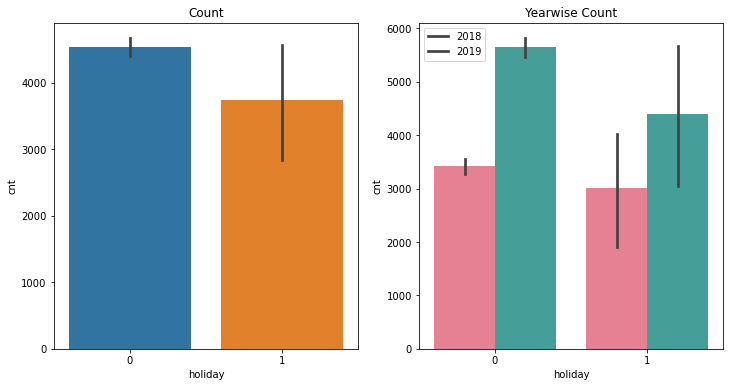

In [19]:
# Holiday VS CNT
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('holiday','cnt',data=bike_df).set(title='Count')
plt.subplot(1,2,2)
sns.barplot('holiday','cnt',data=bike_df, hue='yr',palette='husl').set(title='Yearwise Count')
plt.legend(labels=['2018', '2019'])
plt.show()

📌 Bookings were more on a holiday, which is logically right. 0 = Holiday, 1 = Not a holiday

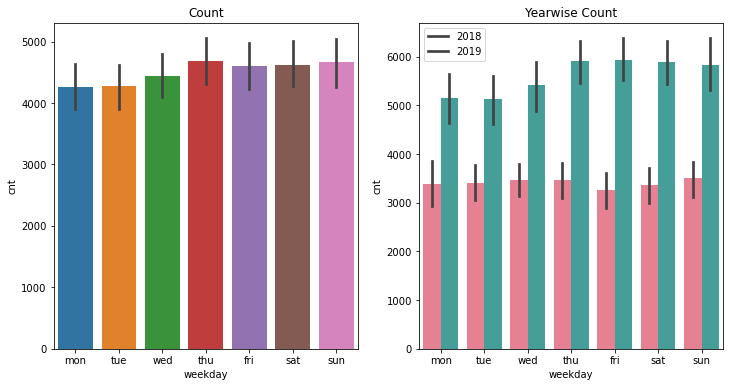

In [20]:
# weekday VS cnt

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('weekday','cnt',data=bike_df).set(title='Count')
plt.subplot(1,2,2)
sns.barplot('weekday','cnt',data=bike_df, hue='yr',palette='husl').set(title='Yearwise Count')
plt.legend(labels=['2018', '2019'])
plt.show()

📌 Thursday was the day with highest number of bookings.

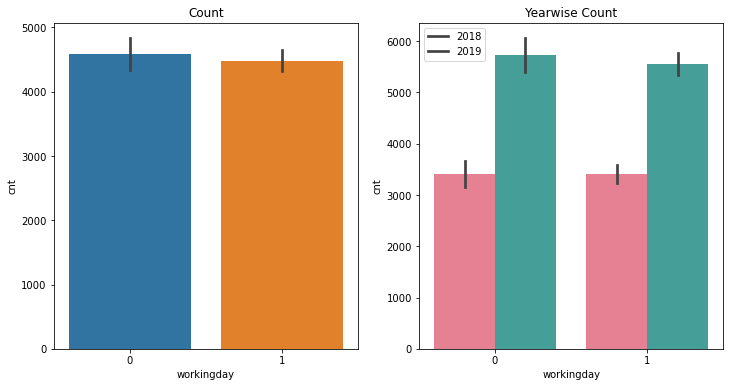

In [21]:
#Workingday VS cnt
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('workingday','cnt',data=bike_df).set(title='Count')
plt.subplot(1,2,2)
sns.barplot('workingday','cnt',data=bike_df, hue='yr',palette='husl').set(title='Yearwise Count')
plt.legend(labels=['2018', '2019'])
plt.show()

📌 Similar to graph of holiday, when it was not a working day booking was high but there not a huge difference from the bookings on a working day. There is a drastic increase in bookings from 2018 to 2019

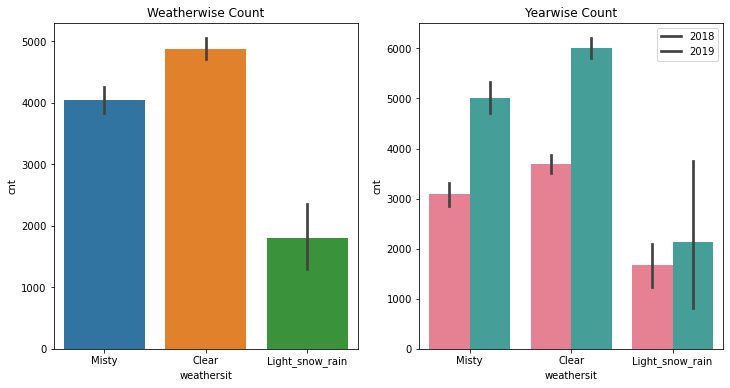

In [22]:
# weathersit VS cnt
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt',data=bike_df).set(title='Weatherwise Count')
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt',data=bike_df, hue='yr',palette='husl').set(title='Yearwise Count')
plt.legend(labels=['2018', '2019'])
plt.show()

📌 Bookings were high on a clear weather, which is quite obvious. Over all the booking increased in 2019 irrespetive of weather conditon.

#### On looking at all the above graphs we observe one common point i.e. Bookings increased in 2019 as compared to 2018 pointing that 2019 was a good financial year for the BoomBikes company.


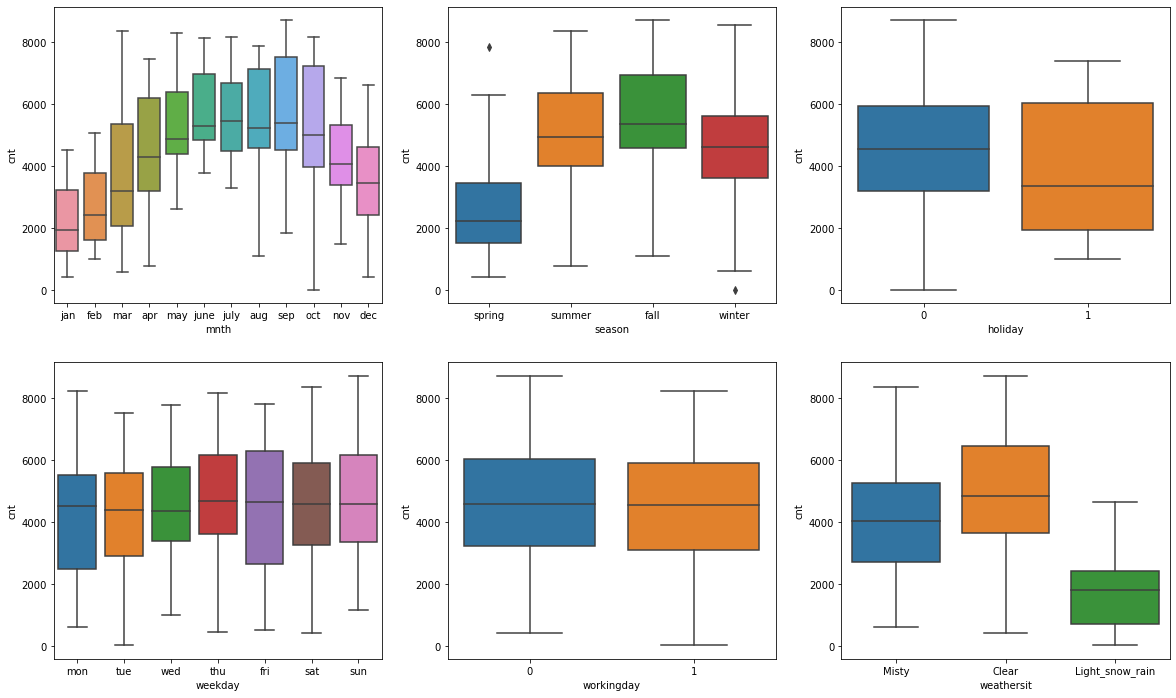

In [23]:
# Creating a bar plot to see if there are any possible outliers related to the predictor variables.

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

#### 

In [25]:
# Checking the correlation between the predictor variables.

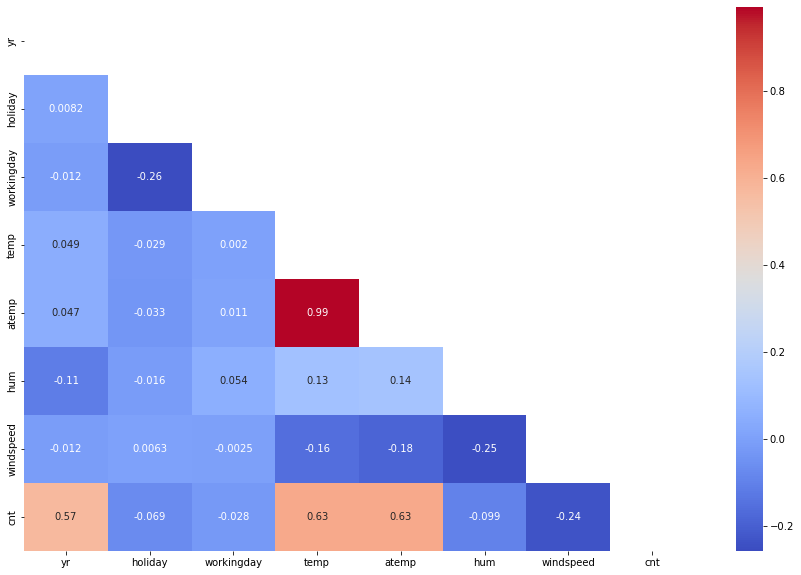

In [24]:
plt.figure(figsize = (15, 10))
matrix = np.triu(bike_df[['season','yr','mnth','holiday','weekday','workingday',
                          'weathersit','temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_df.corr(), annot = True, cmap="coolwarm",mask=matrix)
plt.show()

📌 As we saw in the pair plot, there was a linear relation b/w temp and atemp, Looking at the above heat map confirms our observetion. Both the variables temp and atemp are not a suitable predictor variable to be moved on with.

We cannot conclude any concrete statement for the rest of the variables as of now, we will check and drop any variables at the later stages based on some criteria like p-value or VIF or both combined.

#### 

# STEP 2 :- Preparing the DATA

#### 2.1 Creating Dummy Variables for the categorical columns

In [25]:
month_df=pd.get_dummies(bike_df.mnth,drop_first=True)
weekday_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
season_df=pd.get_dummies(bike_df.season,drop_first=True)

In [26]:
# Merging these Data Frames with the original Data Frame.
new_bike_df=pd.concat([bike_df,month_df,weekday_df,weathersit_df,season_df],axis=1)

In [27]:
new_bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# Deleting the columns as we have created dummy variables for those and we do not need it.
new_bike_df.drop(['mnth','season','weathersit','weekday'], axis=1, inplace=True)

In [29]:
new_bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   aug              730 non-null    uint8  
 9   dec              730 non-null    uint8  
 10  feb              730 non-null    uint8  
 11  jan              730 non-null    uint8  
 12  july             730 non-null    uint8  
 13  june             730 non-null    uint8  
 14  mar              730 non-null    uint8  
 15  may              730 non-null    uint8  
 16  nov              730 non-null    uint8  
 17  oct             

In [31]:

new_bike_df.shape

(730, 30)

#### 2.2 Splitting into TRAIN and TEST data set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
np.random.seed(0)
df_train, df_test = train_test_split(new_bike_df, train_size = 0.7, random_state = 100)

In [34]:
df_train.shape

(510, 30)

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [36]:
df_test.shape

(220, 30)

#### 2.3 Rescaling the features

In [38]:
# by using minmax scaler we will scale the features so that all the variables come at same level. 
# as some variable like 'cnt' have very high value as compared to other columns and it can effect the significance of our mofel.
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [39]:
# Rescaling the numeric variables 
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


📌 As we can see above the min=0 and max=1 and all the other values are b/w 0-1,
which is correct as per the functionality of MinMax Scaling

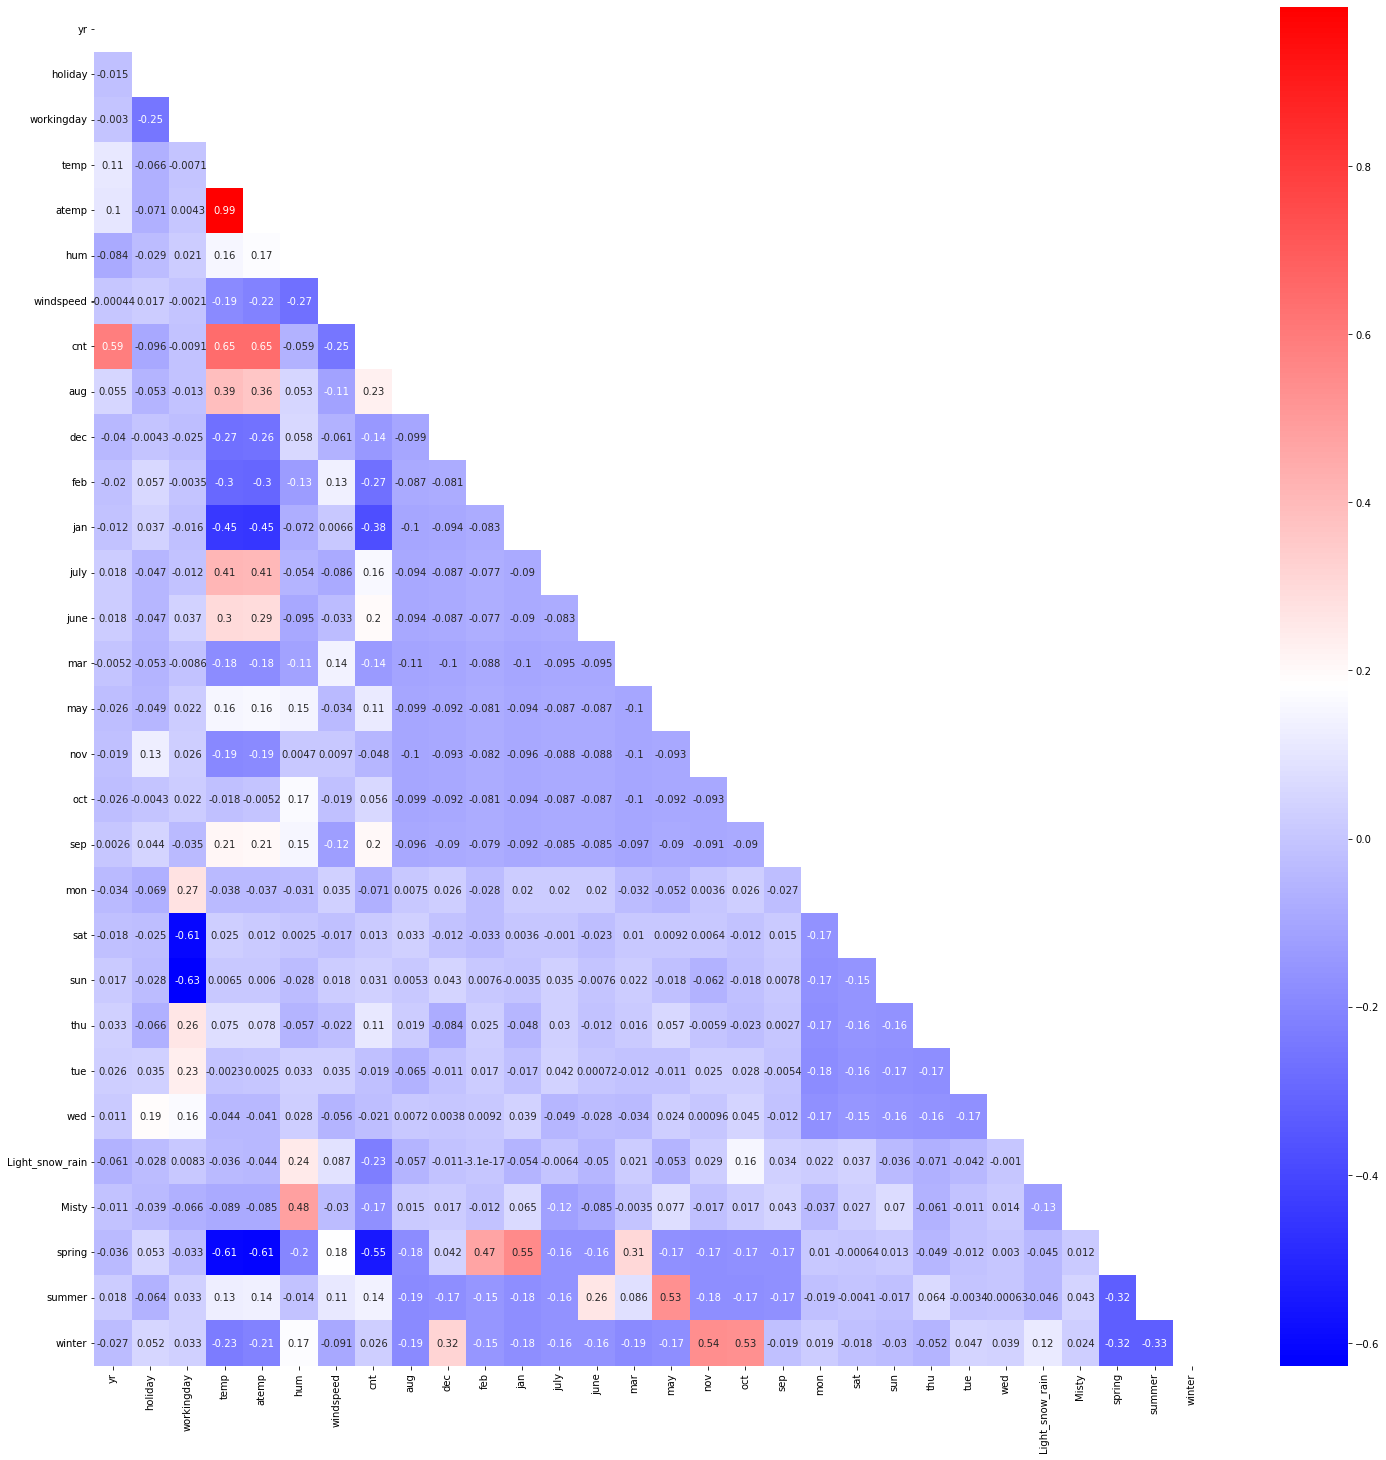

In [42]:
# Again checking the correlation coefficients for multicolinearity in the Train Data Set.

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="bwr", mask=matrix)
plt.show()

#### From above we see that :
1. cnt have correlation with year and temp. 
2. Misty and humidity are aslo corelated. 
3. Spring season shows corealtion with Jan and Feb month.
4. Summer season shows corelation with may month.
5. Winter season with oct and nov month have pretty nice correlation.

##### 2.3 Selecting the right Variables using RFE (Recursive Feature Elimiation)

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# RFE 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snow_rain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

📌 As we know the numeric values tells the importance of that predictor variable. Clearly the variables with values such as 11,13 etc are insignificant for our model. 1 being the high importance and so on.


📌 Let us verify this using RFE.

In [47]:
# checking which columns have been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

📌 Hence, our above statement is verified as RFE also rejects those columns with  low importance.

In [48]:
# Now select the variables selected via RFE in col list

col_list = X_train.columns[rfe.support_]
print(col_list)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'Light_snow_rain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [50]:
# Creating a function to calculate VIF of variables as it will be used multiple times going forward.

def VIF_CAL(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [51]:
# Creating Dataframe with columns resulted from RFE.
X_train_rfe = X_train[col_list]

In [52]:
# Calculating VIF of the above DATA fram
VIF_CAL(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


📌 We can see Humidity has very high VIF.

## 

## STEP 3 :- BUILDING AND TRAINING THE MODEL

In [53]:
# Building our very first model.

import statsmodels.api as sm

# First we will add a constant variable
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Now we run the linear model
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        22:29:31   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036      8.859      0.000       0.249       0.391
yr                  0.2304      0.008     28.487      0.000       0.215       0.246
holiday            -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                0.4815      0.037     13.005      0.000       0.409       0.554
hum                -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed          -0.1887      0.026     -7.315      0.000      -0.239      -0.138
dec                -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan                -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july               -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov                -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep                 0.0755      0.017      4.466      0.000       0.042       0.109
Light_snow_rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty              -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer              0.0423      0.015      2.761      0.006       0.012       0.072
winter              0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_train_rfe_new=X_train_rfe.drop(['hum'], axis=1)


# Checking the VIF again to see if the values have changed.
VIF_CAL(X_train_rfe_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


📌 As we can see by dropping a single variable the VIF of all the other variables also changed when compared with the previous case.
Still there are some variables to be taken care of, which we will identify next.

In [55]:
# 2nd L-R Model

X_train_lm_2 = sm.add_constant(X_train_rfe_new) # Adding constant varieble.

lr_2 = sm.OLS(y_train,X_train_lm_2).fit() # Running the Model

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        22:29:42   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032      7.618      0.000       0.182       0.308
yr                  0.2345      0.008     28.687      0.000       0.218       0.251
holiday            -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                0.4387      0.036     12.093      0.000       0.367       0.510
windspeed          -0.1585      0.025     -6.276      0.000      -0.208      -0.109
dec                -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan                -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july               -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov                -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep                 0.0687      0.017      4.015      0.000       0.035       0.102
Light_snow_rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Misty              -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring             -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer              0.0349      0.015      2.251      0.025       0.004       0.065
winter              0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📌 We can see from the above that the R-Squared and Adj. R-Sqared values are nearly same ~83% which suggests that this is a very good model.
But also we can see some high p-values for the variables. "nov" has a high p-value

In [56]:
# Dropping the variable "nov"

X_train_rfe_new=X_train_rfe_new.drop(['nov'], axis=1)

VIF_CAL(X_train_rfe_new) # Check VIF for any significant change.

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,yr,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


In [57]:
# 3rd L-R Model

X_train_lm_3 = sm.add_constant(X_train_rfe_new) # Adding constant varieble.

lr_3 = sm.OLS(y_train,X_train_lm_3).fit() # Running the Model

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          2.74e-186
Time:                        22:30:00   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031      7.310      0.000       0.167       0.290
yr                  0.2343      0.008     28.573      0.000       0.218       0.250
holiday            -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp                0.4581      0.035     13.031      0.000       0.389       0.527
windspeed          -0.1594      0.025     -6.291      0.000      -0.209      -0.110
dec                -0.0283      0.016     -1.731      0.084      -0.060       0.004
jan                -0.0451      0.018     -2.467      0.014      -0.081      -0.009
july               -0.0499      0.019     -2.686      0.007      -0.086      -0.013
sep                 0.0742      0.017      4.373      0.000       0.041       0.108
Light_snow_rain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Misty              -0.0793      0.009     -9.089      0.000      -0.096      -0.062
spring             -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer              0.0404      0.015      2.635      0.009       0.010       0.070
winter              0.0774      0.017      4.438      0.000       0.043       0.112
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📌 We can observe here that as compared to 2nd Model, now the variable 'DEC' has a high p-value.
So, we drop the variable 'DEC'

In [58]:
X_train_rfe_new=X_train_rfe_new.drop(['dec'], axis=1)

# Checkinf for change in VIF
VIF_CAL(X_train_rfe_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


📌 Still NO major changes.

In [59]:
# 4th L-R Model.

X_train_lm_4=sm.add_constant(X_train_rfe_new) # Adding constant varieble.

lr_4 = sm.OLS(y_train,X_train_lm_4).fit() # Running the Model

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          8.14e-187
Time:                        22:30:16   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030      7.088      0.000       0.156       0.275
yr                  0.2343      0.008     28.517      0.000       0.218       0.250
holiday            -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                0.4721      0.034     13.772      0.000       0.405       0.539
windspeed          -0.1549      0.025     -6.135      0.000      -0.205      -0.105
jan                -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july               -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                 0.0764      0.017      4.506      0.000       0.043       0.110
Light_snow_rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty              -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring             -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer              0.0434      0.015      2.845      0.005       0.013       0.073
winter              0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📌   Here we Observe that variable 'jan' has high p-value and hence it should be dropped.

In [60]:
X_train_rfe_new=X_train_rfe_new.drop(['jan'], axis=1)

# Again checkinf VIF for change in values.

VIF_CAL(X_train_rfe_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snow_rain,1.08


In [61]:
# 5th L-R Model.

X_train_lm_5=sm.add_constant(X_train_rfe_new)  # Adding constant varieble.

lr_5=sm.OLS(y_train,X_train_lm_5).fit()  # Running the Model

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          5.06e-187
Time:                        22:30:30   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030      6.746      0.000       0.141       0.258
yr                  0.2336      0.008     28.352      0.000       0.217       0.250
holiday            -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                0.4910      0.033     14.770      0.000       0.426       0.556
windspeed          -0.1479      0.025     -5.887      0.000      -0.197      -0.099
july               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                 0.0768      0.017      4.517      0.000       0.043       0.110
Light_snow_rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty              -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring             -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer              0.0465      0.015      3.051      0.002       0.017       0.076
winter              0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_train_rfe_new=X_train_rfe_new.drop(['july'], axis=1)

# Again checkinf VIF for change in values.

VIF_CAL(X_train_rfe_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snow_rain,1.08
1,holiday,1.04


In [63]:
# 6th L-R Model.
X_train_lm_6=sm.add_constant(X_train_rfe_new)  # Adding constant varieble.

lr_6=sm.OLS(y_train,X_train_lm_6).fit()  # Running the Model

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          1.47e-186
Time:                        22:30:39   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030      6.447      0.000       0.133       0.249
yr                  0.2341      0.008     28.237      0.000       0.218       0.250
holiday            -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                0.4777      0.033     14.423      0.000       0.413       0.543
windspeed          -0.1481      0.025     -5.854      0.000      -0.198      -0.098
sep                 0.0910      0.016      5.566      0.000       0.059       0.123
Light_snow_rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty              -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring             -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer              0.0621      0.014      4.350      0.000       0.034       0.090
winter              0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 📌 Finally from our 6th model we say that the model can be CONSIDERED based on the below points :
    1. The VIF of all variables is under acceptable range i.e very low multicolinearity and p-values are also in acceptable Range.
    2. The F-Statics is also greater that 1 (284.4) which again is a very good value.
    3. The p-value (Prob (F-statistic)) of 1.47e-186 suggest it is almost equal to 0 which is a good point.
    4. The R-Squared and Adj. R-Squared are also at a very good ~ 83%.

In [64]:
lr_6.params

const              0.190855
yr                 0.234132
holiday           -0.096316
temp               0.477737
windspeed         -0.148098
sep                0.090998
Light_snow_rain   -0.285031
Misty             -0.078741
spring            -0.055406
summer             0.062076
winter             0.094476
dtype: float64

#### 

## STEP 4 :- RESIDUAL ANALYSIS.

Residual is the actul y trained minus the y predicted. 
Now we already have trained model, we need to get the Y predicted values.

In [65]:
Y_train_pred = lr_6.predict(X_train_lm_6) # Getting predicted values based on train data set
Y_train_pred

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
         ...   
578    0.810023
53     0.215752
350    0.261221
79     0.316747
520    0.641815
Length: 510, dtype: float64

##### Checking for Normality of the error terms.

Text(0.5, 0, 'Errors')

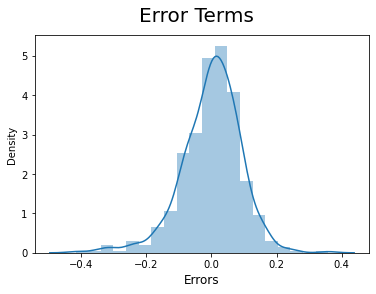

In [66]:
# Finding out Residuals.

Res=(y_train - Y_train_pred)

# As we know to check for normality we will use histogram.

fig = plt.figure()
sns.distplot(Res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 12)

📌 It can be clearly observed from the above that the Erros are normally distributed.

##### CHECKING MULTICOLINEARITY B/W the Variables

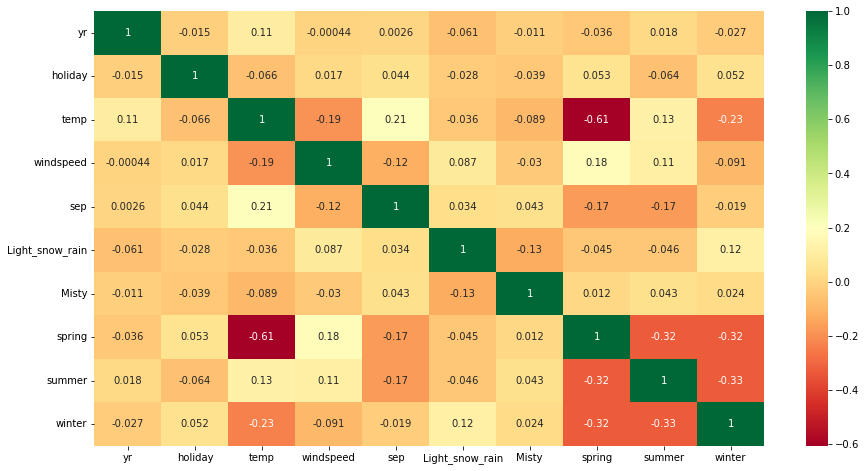

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

##### CHECKING FOR Homoscedasticity

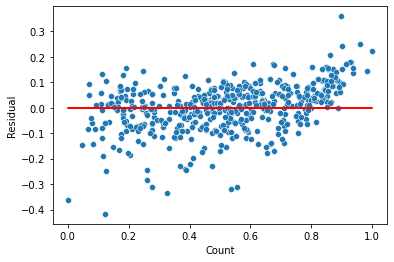

In [70]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

📌 There is no such visibal pattern for the residuals from the above graph.

## STEP 5 :- Prediction and Evaluation on Test Data Set.

🔰 Now we come to our final stage, after fitting the model and checking normality of errors, we start to make prediction using our final lr_6 model.

In [71]:
# Scaling the Test Data Set to match the train data.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [72]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snow_rain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:

col1 = X_train_rfe_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [76]:
# Getting y predicted based on test data.
y_pred = lr_6.predict(X_test_lm_6)

In [77]:
y_pred

184    0.400699
535    0.894906
299    0.401679
221    0.561750
152    0.563769
         ...   
702    0.725548
127    0.521945
640    0.789203
72     0.263720
653    0.718507
Length: 220, dtype: float64

### EVALUATION

Text(0, 0.5, 'y_pred')

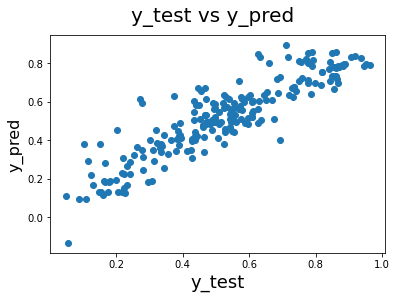

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

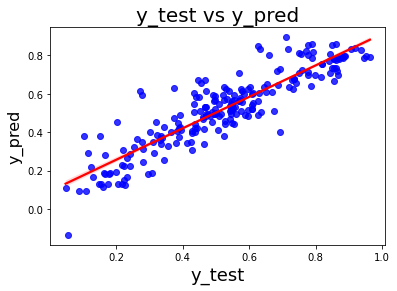

In [79]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [80]:
round(lr_6.params,4)

const              0.1909
yr                 0.2341
holiday           -0.0963
temp               0.4777
windspeed         -0.1481
sep                0.0910
Light_snow_rain   -0.2850
Misty             -0.0787
spring            -0.0554
summer             0.0621
winter             0.0945
dtype: float64

📌 Hence as per above observation out EQUATION for the Best FIT Line is :

##### cnt= 0.1909  +  (yr * 0.2341)  -  (holiday * 0.0963)  +  (temp * 0.4777 ) -  (windspeed * 0.1481)  +  (sep * 0.0910)  -  (Light_snow_rain * 0.2850) -  (Misty * 0.0787)  -  (spring * 0.0554)  +  (summer * 0.0621)  +  (winter * 0.0945)

##### 

In [83]:
# Calculation R-Squared value.
from sklearn.metrics import r2_score
R_Squared = r2_score(y_test, y_pred)
print("R-Squared Values on test data set is = ", round(R_Squared,4))

R-Squared Values on test data set is =  0.8038


In [85]:
# Calculating Adjusted-R-Squared value on the test dataset

adj_R_Squared = round(1-(1-R_Squared)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Adjacent R-Squared Value for test dataset is = ",adj_R_Squared)

Adjacent R-Squared Value for test dataset is =  0.7944


##### 📌 The major predictor varibles that affect the number of bookings are :
    1. temp : It has the highest +'ve coeffecient corresponding to increase in booking with per unit increase in temp.
    2. yr : Similar to temp this also has high +'ve coeffecient.
    3. Light_Snow_Rain : It has the highest -'ve coeffeciet i.e for every increase in this variable the booking decreases. Which is a good sign,as people will not go out in rain/snow.
    4. sep : As the fall season starts in september and we saw highest bookings in FALL season.
    5. winter : This variables has motly negative correlation with other variable, which definately affects the number of booking like speaking only WRT to season if temp in winter is very low it will adversly affect the bookings.

##### 📌 So, these variables should be taken in consideration to achive maximum number of bookings.

#### 

#### 

                                                    **** END ****